In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
measurement = Base.classes.measurement
station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [10]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

Print Columns in Both Tables

In [11]:
print('Measurement:')
print()
measurement_columns= inspector.get_columns('measurement')
for c in measurement_columns:
    print(c['name'], c["type"])
print()
print('Stations:')
print()
sCols = inspector.get_columns('measurement')
for c in measurement_columns:
    print(c['name'], c["type"])

Measurement:

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT

Stations:

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


Latest Date?

In [12]:
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23')

Total date counts

In [13]:
session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).count()

19550

Count of results after 2016-08-23

In [14]:
session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date).count()


2223

In [15]:
new_table = session.query(measurement.date, measurement.prcp).order_by(measurement.date.desc()).all()
table = pd.DataFrame(new_table)
table.count()

date    19550
prcp    18103
dtype: int64

# Exploratory Climate Analysis

## Precipitation Analysis

#Design a query to retrieve the last 12 months of precipitation data and plot the results

Calculate the date 1 year ago from the last data point in the database

Perform a query to retrieve the data and precipitation scores

Save the query results as a Pandas DataFrame and set the index to the date column

Sort the dataframe by date

Use Pandas Plotting with Matplotlib to plot the data


#### Design a query to retrieve the last 12 months of precipitation data and plot the results

In [16]:
# Breakdown

#Calculate the date 1 year ago from the last data point in the database

In [17]:
last_date = session.query(measurement.date).order_by(measurement.date.desc()).first()
last_date

('2017-08-23')

#Perform a query to retrieve the data and precipitation scores

In [18]:
twelve_months = session.query(measurement.date, measurement.prcp).\
    filter(measurement.date > '2016-08-23').\
    order_by(measurement.date.desc()).all()

#Save the query results as a Pandas DataFrame and set the index to the date column

In [19]:
rain_df = pd.DataFrame(twelve_months)
rain_df = rain_df.set_index('date')

#Sort the dataframe by date

In [20]:
rain_df.sort_index()

,prcp
date,
2016-08-24,1.45
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.15
2016-08-24,NaN
...,...
2017-08-22,0.00
2017-08-23,0.45
2017-08-23,0.08


#Use Pandas Plotting with Matplotlib to plot the data


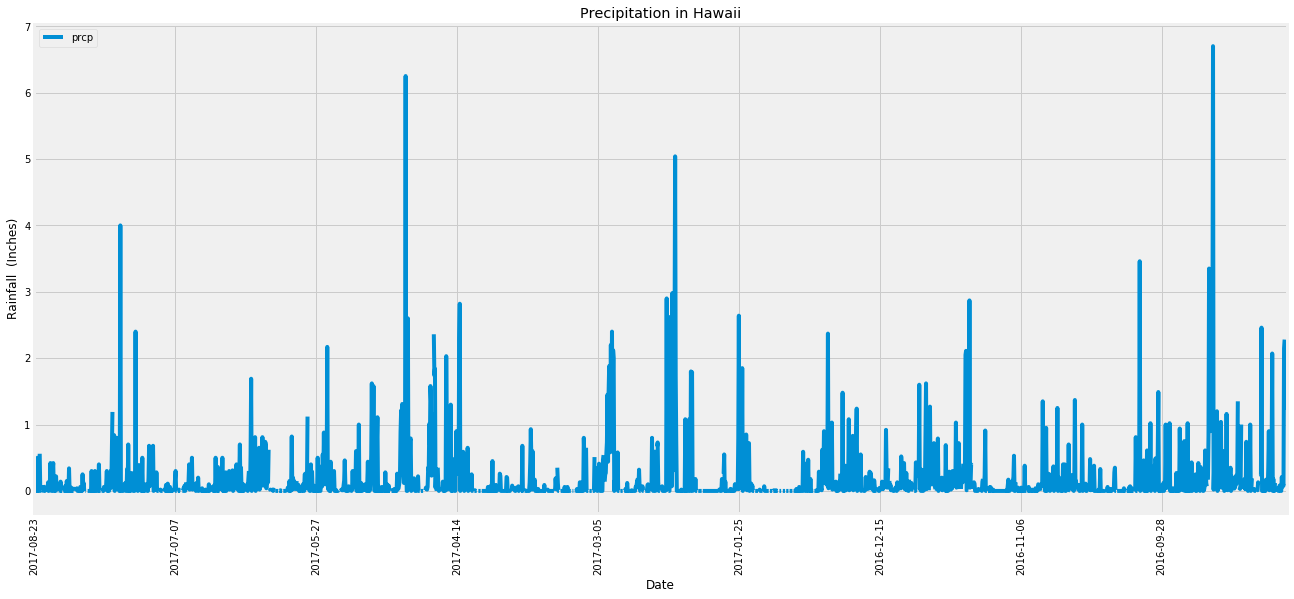

In [21]:
rain_df.plot(figsize=(20,9), rot=90)
plt.title("Precipitation in Hawaii")
plt.ylabel("Rainfall  (Inches)")
plt.xlabel("Date")
plt.legend(loc=2)

#Use Pandas to calcualte the summary statistics for the precipitation data

In [22]:
rain_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


## Station Analysis

In [23]:
num_of_stations = session.query(station.id).distinct().count()
print(f"Number of Stations: {num_of_stations}")

Number of Stations: 9


In [24]:
# Design a query to show how many stations are available in this dataset?
stations = session.query(measurement).filter(measurement.station)

for s in session.query(station, station.station, station.name).limit(10).all():
    print(f"Station ID: {s[1]} | Station Name: {s[2]}")

Station ID: USC00519397 | Station Name: WAIKIKI 717.2, HI US
Station ID: USC00513117 | Station Name: KANEOHE 838.1, HI US
Station ID: USC00514830 | Station Name: KUALOA RANCH HEADQUARTERS 886.9, HI US
Station ID: USC00517948 | Station Name: PEARL CITY, HI US
Station ID: USC00518838 | Station Name: UPPER WAHIAWA 874.3, HI US
Station ID: USC00519523 | Station Name: WAIMANALO EXPERIMENTAL FARM, HI US
Station ID: USC00519281 | Station Name: WAIHEE 837.5, HI US
Station ID: USC00511918 | Station Name: HONOLULU OBSERVATORY 702.2, HI US
Station ID: USC00516128 | Station Name: MANOA LYON ARBO 785.2, HI US


In [25]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

station_activity = session.query(station, measurement).filter(station.station == measurement.station)


In [26]:

#station_counts = session.query(measurement.station, func.count(measurement.id)).group_by(measurement.station).\
    #order_by(func.count(measurement.id).desc()).all()

st_count = session.query(measurement.station, station.name, func.count(measurement.id)).\
    filter(measurement.station == station.station).group_by(measurement.station, station.name).\
    order_by(func.count(measurement.id).desc()).all()
for i in st_count:
    print(f"Station: {i[0]}  Name: {i[1]} \t \tCount: {i[2]}")

Station: USC00519281  Name: WAIHEE 837.5, HI US 	 	Count: 2772
Station: USC00519397  Name: WAIKIKI 717.2, HI US 	 	Count: 2724
Station: USC00513117  Name: KANEOHE 838.1, HI US 	 	Count: 2709
Station: USC00519523  Name: WAIMANALO EXPERIMENTAL FARM, HI US 	 	Count: 2669
Station: USC00516128  Name: MANOA LYON ARBO 785.2, HI US 	 	Count: 2612
Station: USC00514830  Name: KUALOA RANCH HEADQUARTERS 886.9, HI US 	 	Count: 2202
Station: USC00511918  Name: HONOLULU OBSERVATORY 702.2, HI US 	 	Count: 1979
Station: USC00517948  Name: PEARL CITY, HI US 	 	Count: 1372
Station: USC00518838  Name: UPPER WAHIAWA 874.3, HI US 	 	Count: 511


In [27]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
station_temp = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()
station_temp

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature (F)')

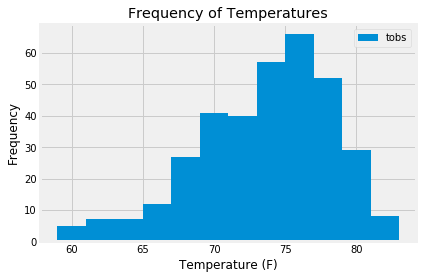

In [28]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
something = session.query(measurement.tobs).filter(measurement.date > '2016-08-23').\
            filter(measurement.station == "USC00519281").all()
something_df = pd.DataFrame(something)
something_df.plot.hist(bins=12)
plt.title("Frequency of Temperatures")
plt.xlabel("Temperature (F)")

## Bonus Challenge Assignment

In [37]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d    
    Returns:
        TMIN, TAVE, and TMAX
    """
    return session.query(func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)).\
        filter(measurement.date >= start_date).filter(measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
vacation_dates = input(start_date)

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [32]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

In [40]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    Args:
        date (str): A date string in the format '%m-%d'    
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    """
    sel = [func.min(measurement.tobs), func.avg(measurement.tobs), func.max(measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [34]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [35]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [36]:
# Plot the daily normals as an area plot with `stacked=False`
